In [1]:
import pyfastwell as pwf
from pythermonomics.geothermal_economics import GeothermalEconomics
import sys
sys.setrecursionlimit(3000)

In [2]:
def dorun(settingfile, trajectoryfile):
    economics = GeothermalEconomics.from_trajectory(settingfile, trajectoryfile)
    npv, lcoe, cashflow, simdata, wells, well_results = economics.compute_economics()
    print(f"Well cost {cashflow['wellcosts'].iloc[0] / 1e6} MEUR")
    economics = GeothermalEconomics.from_trajectory(settingfile, trajectoryfile)
    npv, lcoe, cashflow, simdata, wells, well_results = economics.compute_economics()
    print(f"Well cost {cashflow['wellcosts'].iloc[0] / 1e6} MEUR")

    fastmodel = pwf.WellFastModel(economics, k=100, khkv=3, segmentlength=50, verbose=False)
    fastmodel.set_dP_BHP(60)
    npv, lcoe_val, cashflow, simdata, wells, well_results, cop, power, Tsurface, DT_eff, DP_eff = fastmodel.compute_economics()
    print(
        f"NPV {npv}, LCOE {lcoe_val}, COP {cop}, Power {power} MW, Treservoir {fastmodel.production_temperature} C, Tsurface {Tsurface} C, DT_eff {DT_eff} C, DP_eff {DP_eff} bar")
    print(f"Well cost {cashflow['wellcosts'].iloc[0] / 1e6} MEUR")

    for i, w in enumerate(fastmodel.wells):
        print(f"Well cumulative AHD {w.cumulative_ahd()}")

    L = 1300
    dia_inch = 8
    rw = dia_inch * 0.0254 * 0.5
    skin_inj, skin_prd, ratio = fastmodel.getSkinFactors_dc1d(L, rw)
    print(
        f"for use in DC1D with L ={L} [m]  and diameter={dia_inch} [inch] Skin factors: inj {skin_inj}, prd {skin_prd}, ratio {ratio}")

    skin = fastmodel.skin_from_deviation(fastmodel.H, rw, fastmodel.khkv, deviation=45.0, type='cinco')
    print(f"for H {fastmodel.H}, khkv {fastmodel.khkv}, diameter={dia_inch} [inch] Skin factors: inj {skin}")

    fastmodel.run_coldfront(simyears=30, rockdens=2700.0, rockcap=1000.0, porosity=0.21)
    fastmodel.plot_coldfront()

    fastmodel.plot_trajectories()

In [3]:
settingfile = 'input/npv_thermogis2024_138.yml'

In [4]:
trajectoryfile = 'input/inputsStandardDetailed.yml'

finding KOP for plane, adinclination, adlocal, inclincation, xoff, zoff  180.0/90.0 90.0/45.0 45.0/-0.0 45.0 700.0 2400.0
finding KOP for plane, adinclination, adlocal, inclincation, xoff, zoff  360.0/90.0 270.0/45.0 45.0/0.0 45.0 700.0 2400.0
Well cost 10.60913311436677 MEUR
finding KOP for plane, adinclination, adlocal, inclincation, xoff, zoff  180.0/90.0 90.0/45.0 45.0/-0.0 45.0 700.0 2400.0
finding KOP for plane, adinclination, adlocal, inclincation, xoff, zoff  360.0/90.0 270.0/45.0 45.0/0.0 45.0 700.0 2400.0
Well cost 10.60913311436677 MEUR
NPV -8140091.211081035, LCOE 11.425577566311908, COP 11.746548832401784, Power 3.730399027503236 MW, Treservoir 82.85 C, Tsurface 80.05446605071586 C, DT_eff 30.05446605071586 C, DP_eff 59.38099077133143 bar
Well cost 10.60913311436677 MEUR
Well cumulative AHD 2665.245012900713
Well cumulative AHD 2665.245012900713
for use in DC1D with L =1300 [m]  and diameter=8 [inch] Skin factors: inj -0.9566936657524142, prd -0.9566936657505277, ratio 1.1

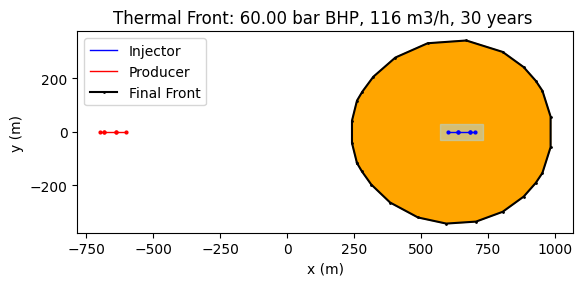

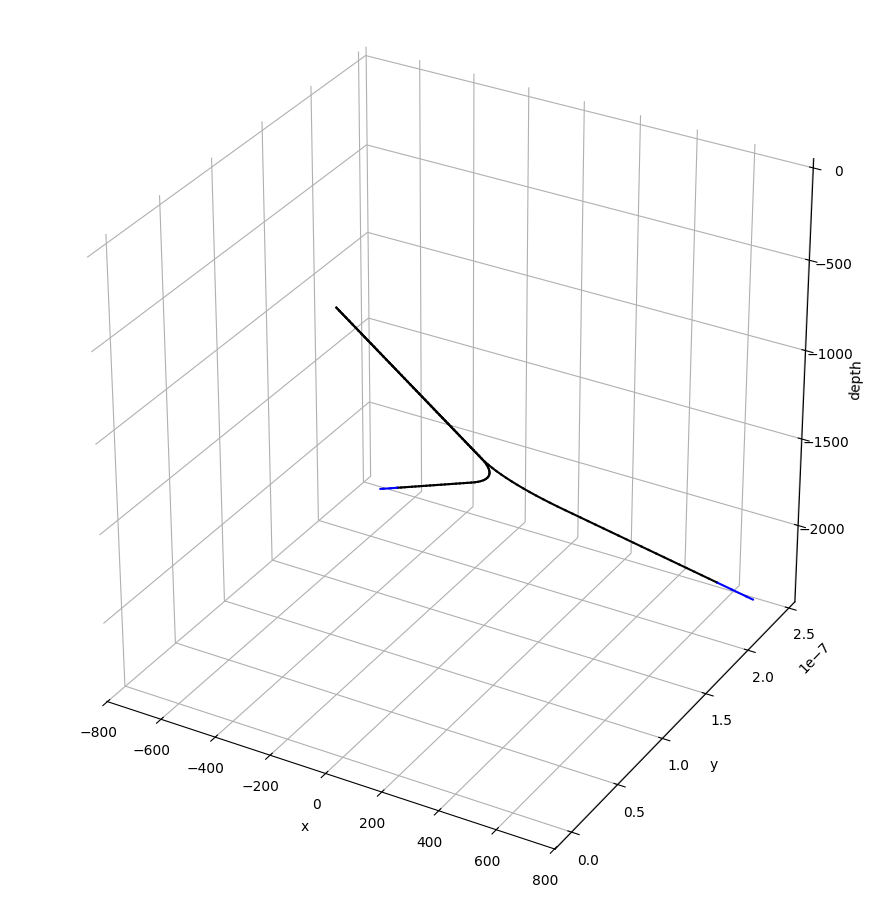

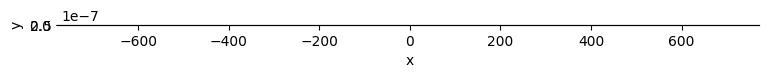

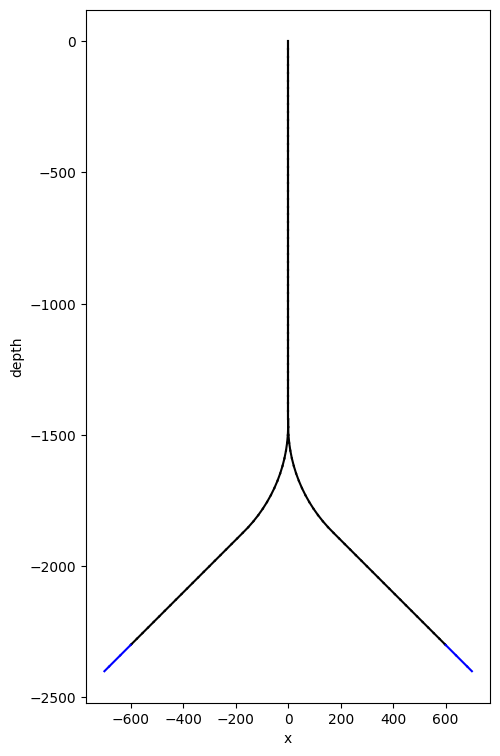

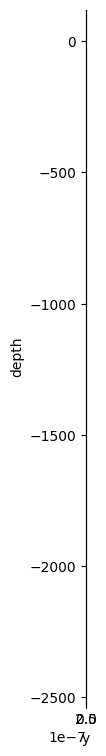

In [5]:
dorun(settingfile,trajectoryfile)

In [6]:
trajectoryfile = 'input/inputsMultilateral3legsDetailed.yml'

finding KOP for plane, adinclination, adlocal, inclincation, xoff, zoff  180.0/90.0 90.0/40.0 40.0/-0.0 50.0 300.0 2200.0
finding KOP for plane, adinclination, adlocal, inclincation, xoff, zoff  180.0/90.0 90.0/25.0 75.0/0 15.0 45.525201528544585 209.8272051612596
finding KOP for plane, adinclination, adlocal, inclincation, xoff, zoff  130.27/47.72 60.97/21.24 59.0/0 31.0 68.31758865650909 194.50631629888017
finding KOP for plane, adinclination, adlocal, inclincation, xoff, zoff  229.73/132.28 119.03/21.24 59.0/0 31.0 68.31758865650897 194.50631629887994
warning parallel orientation  take as plane 
warning parallel orientation  take as plane 
warning parallel orientation  take as plane 
finding KOP for plane, adinclination, adlocal, inclincation, xoff, zoff  360.0/90.0 270.0/40.0 40.0/0.0 50.0 300.0 2200.0
finding KOP for plane, adinclination, adlocal, inclincation, xoff, zoff  0.0/90.0 270.0/25.0 75.0/0 15.0 45.525201528544585 209.8272051612596
finding KOP for plane, adinclination, ad

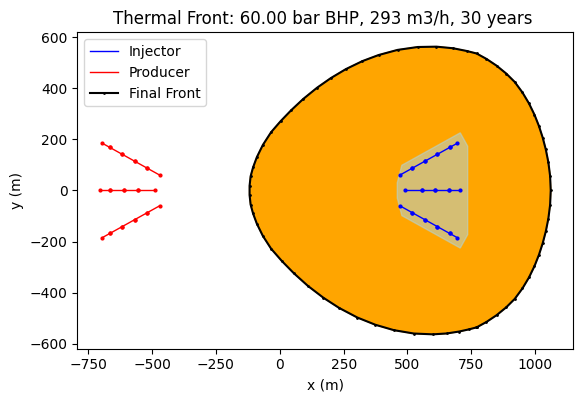

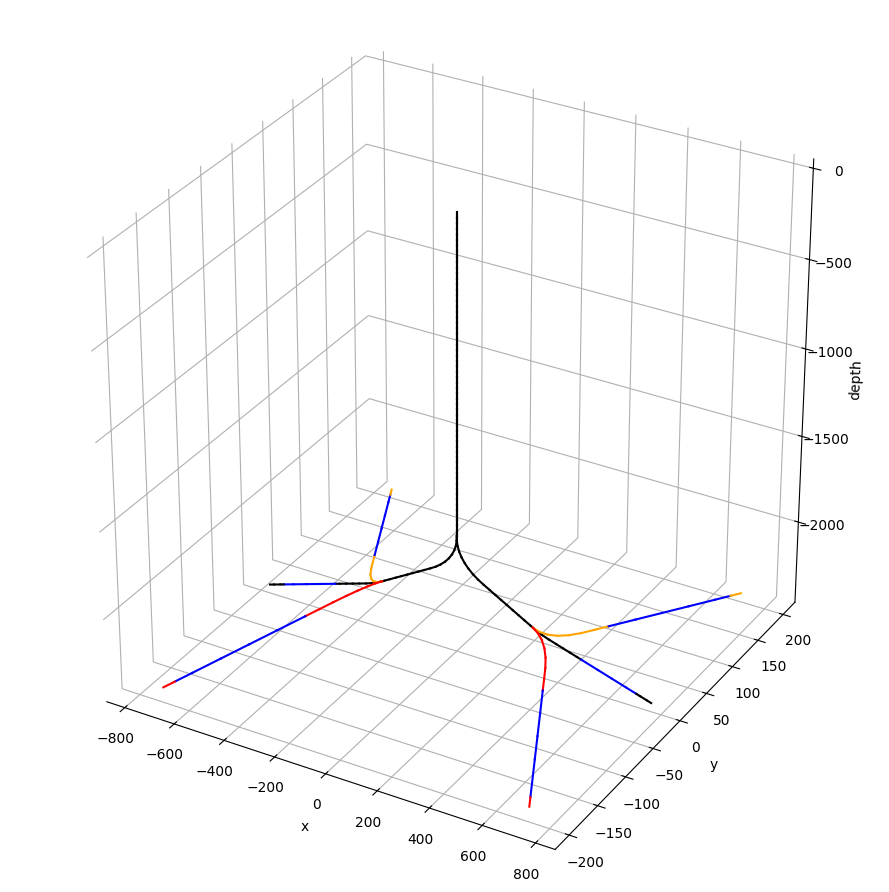

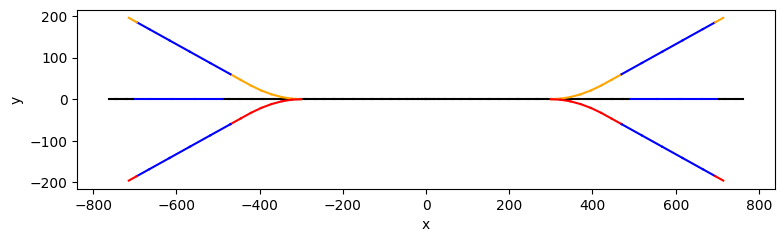

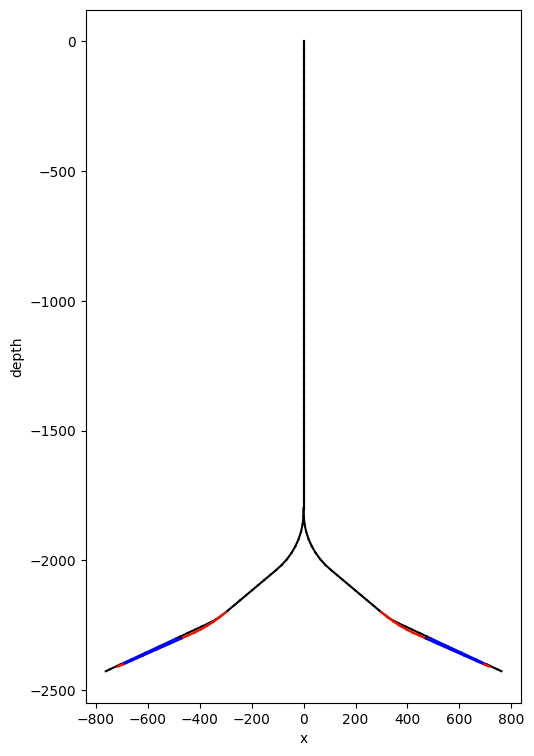

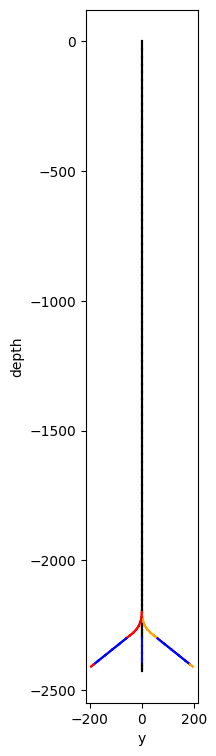

In [7]:
dorun(settingfile,trajectoryfile)

In [8]:
trajectoryfile = 'input/inputsDetailedTNOhor.yml'

finding KOP for plane, adinclination, adlocal, inclincation, xoff, zoff  216.87/90.0 126.87/40 40.0/-0.0 50.00048617083088 500.01697054545184 1999.9957572871372
finding KOP for plane, adinclination, adlocal, inclincation, xoff, zoff  207.53/79.06 123.03/26.37 76.0/0 14.0 80.71185428797276 404.33352146142556
finding KOP for plane, adinclination, adlocal, inclincation, xoff, zoff  178.68/41.3 95.69/6.12 57.0/0 33.0 580.137848081284 1087.8603206403
warning parallel orientation  take as plane 
not supported
finding KOP for plane, adinclination, adlocal, inclincation, xoff, zoff  -33.46/90 56.54/4.86 4.86/0.94 85.13559699724823 816.0898079517044 2288.4236559074807
finding KOP for plane, adinclination, adlocal, inclincation, xoff, zoff  250.0/175.0 70/5 76.59/0.0 13.411623590799437 15.625221692723358 132.89483656650907
warning parallel orientation  take as plane 
Well cost 18.214989038802823 MEUR
finding KOP for plane, adinclination, adlocal, inclincation, xoff, zoff  216.87/90.0 126.87/40 4

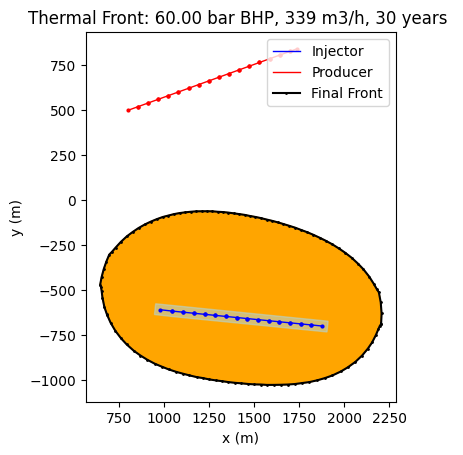

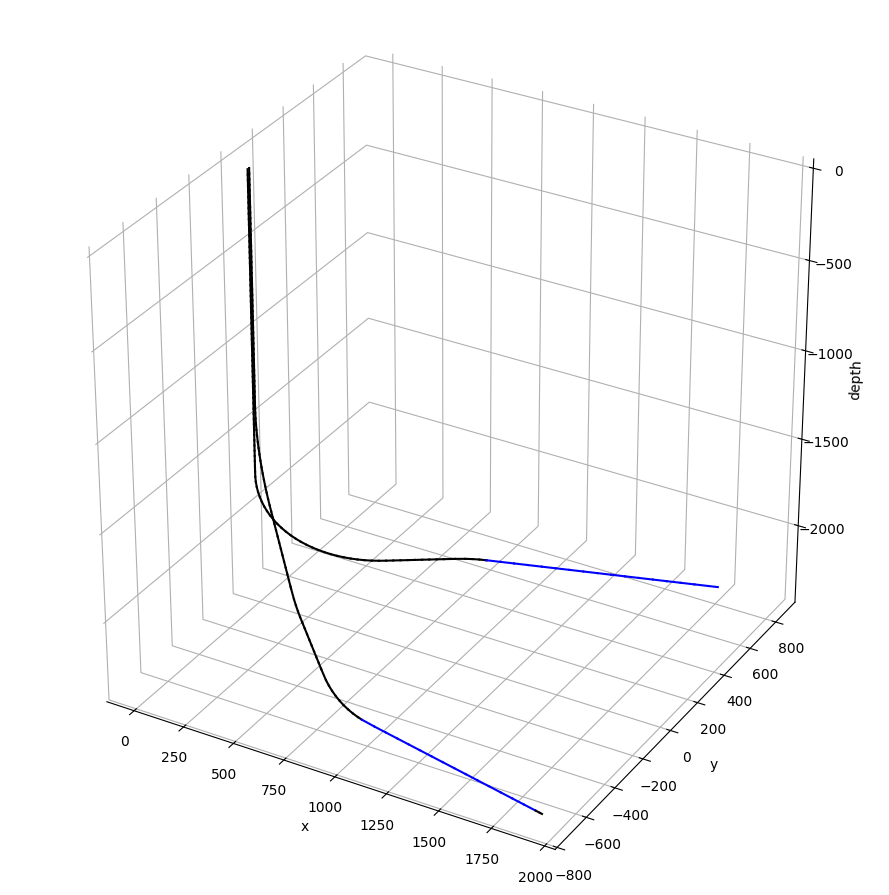

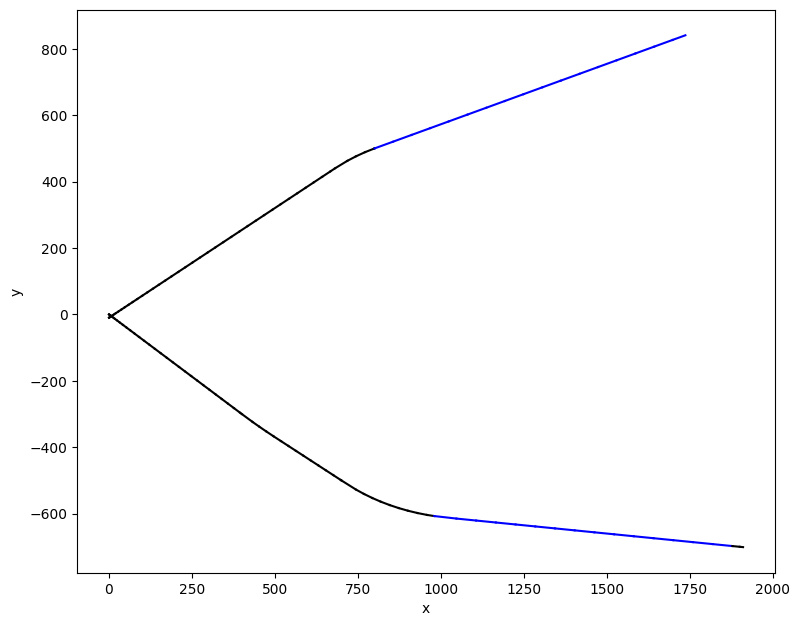

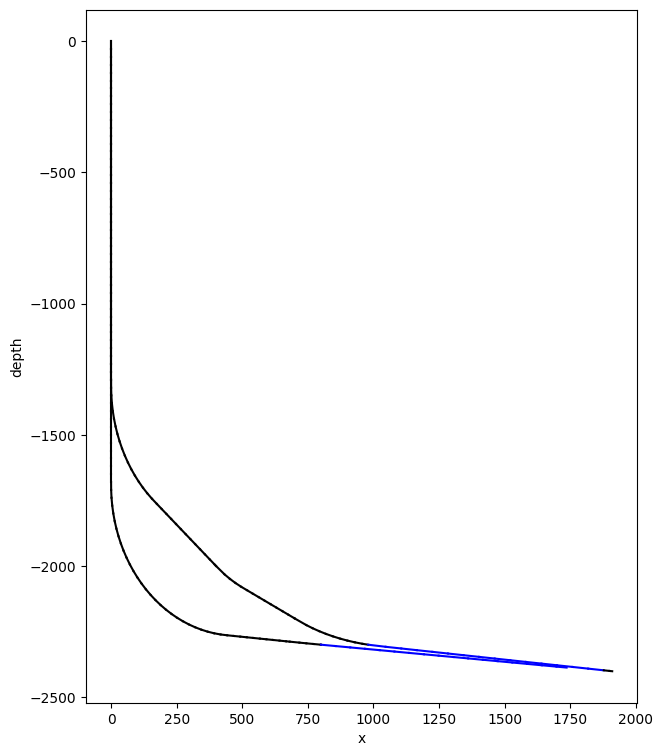

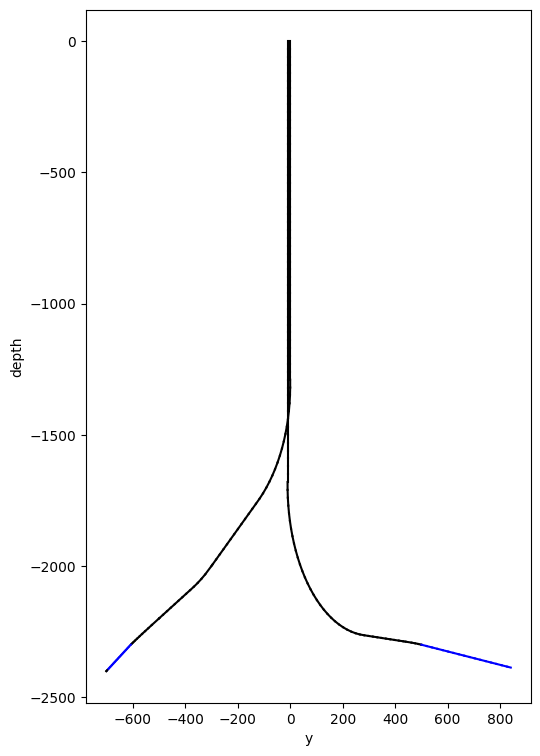

In [9]:
dorun(settingfile, trajectoryfile)

In [10]:
trajectoryfile = 'input/inputXYZ3legs.yml'

Well cost 14.672954988608415 MEUR
Well cost 14.672954988608415 MEUR
NPV -7735857.365880297, LCOE 7.385685053727356, COP 8.719308075959944, Power 9.995526543163788 MW, Treservoir 82.85 C, Tsurface 81.71023805486493 C, DT_eff 31.71023805486493 C, DP_eff 84.4196116259842 bar
Well cost 14.672954988608415 MEUR
Well cumulative AHD 3285.5092609735475
Well cumulative AHD 3463.299957289788
for use in DC1D with L =1300 [m]  and diameter=8 [inch] Skin factors: inj -5.560676137618708, prd -6.930501087075953, ratio 2.427221433441012
for H 100.0, khkv 3, diameter=8 [inch] Skin factors: inj -0.9100052327471968
years_t0 1.3942478583957991


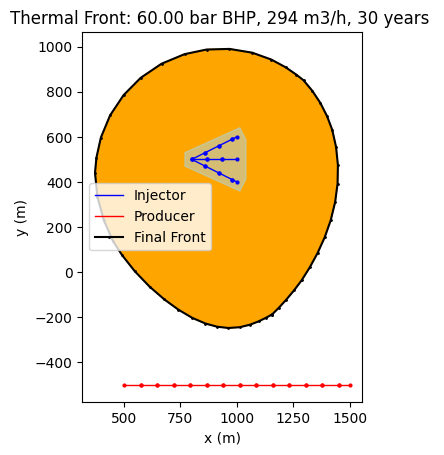

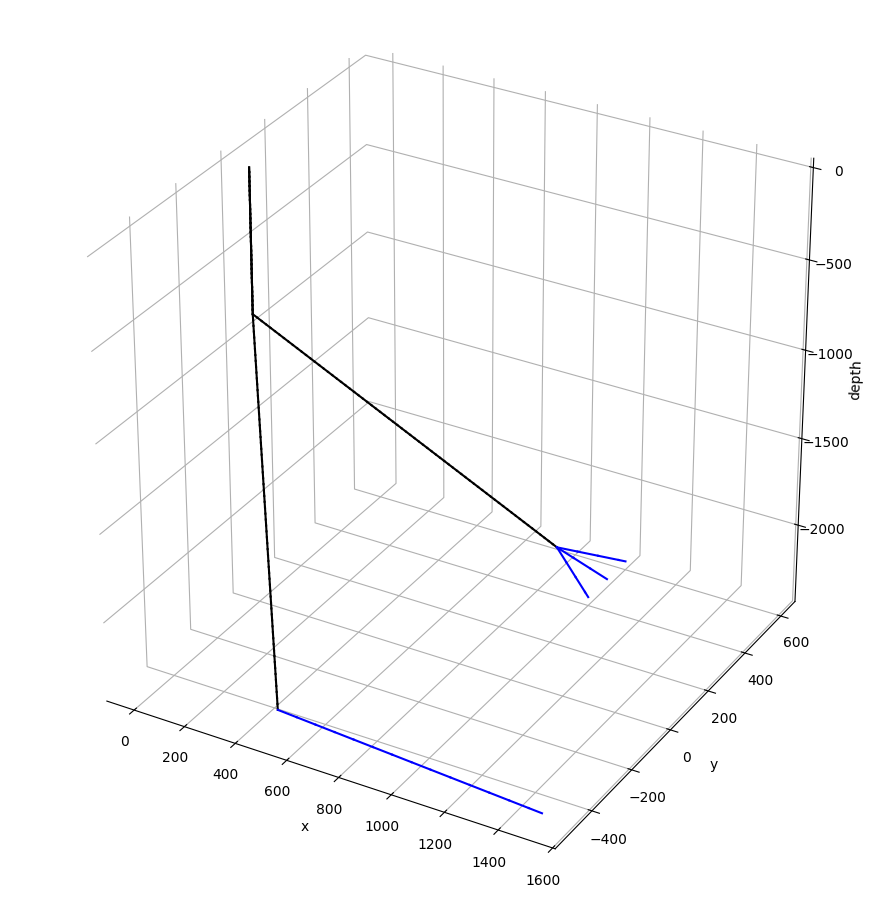

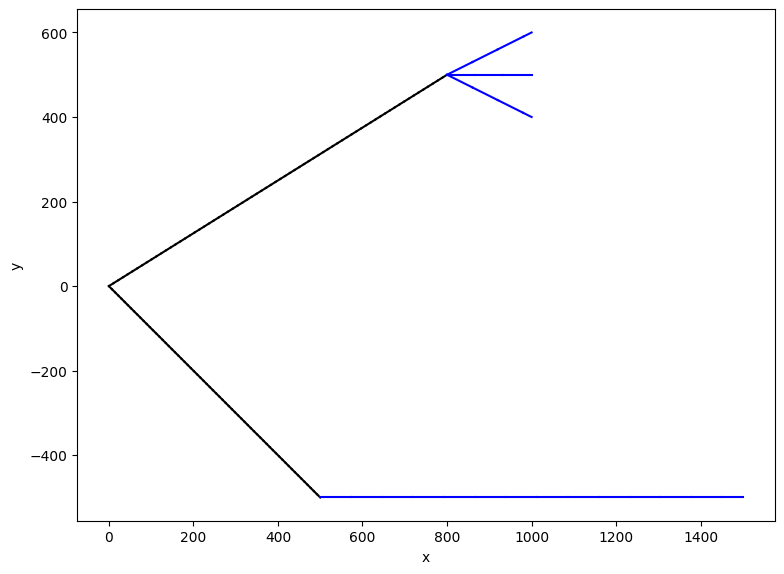

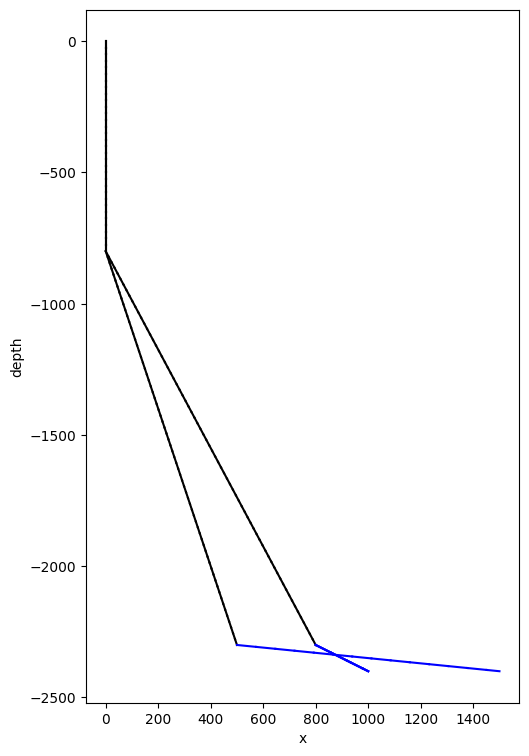

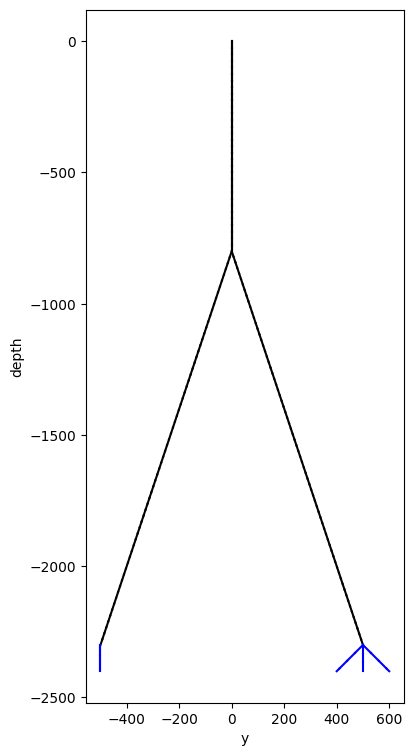

In [11]:
dorun(settingfile, trajectoryfile)

In [14]:
trajectoryfile = 'input/inputXYZspline.yml'

Well cost 12.769407234312531 MEUR
Well cost 12.769407234312531 MEUR
NPV -8395600.907494752, LCOE 9.294144059354405, COP 10.89327383988541, Power 5.83752634221084 MW, Treservoir 82.85 C, Tsurface 80.99685563417597 C, DT_eff 30.996855634175972 C, DP_eff 66.00586283587515 bar
Well cost 12.769407234312531 MEUR
Well cumulative AHD 3590.2645142395586
Well cumulative AHD 2453.7204591879654
for use in DC1D with L =1300 [m]  and diameter=8 [inch] Skin factors: inj -6.527277160602642, prd 0.14044554435553452, ratio 3.228078703563432
for H 100.0, khkv 3, diameter=8 [inch] Skin factors: inj -0.9100052327471968
years_t0 3.084027050575508


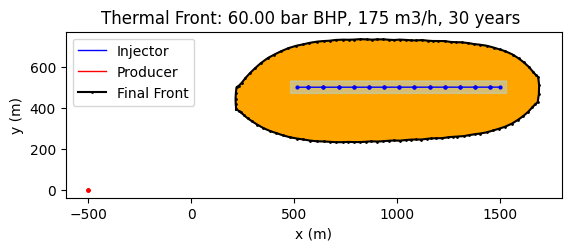

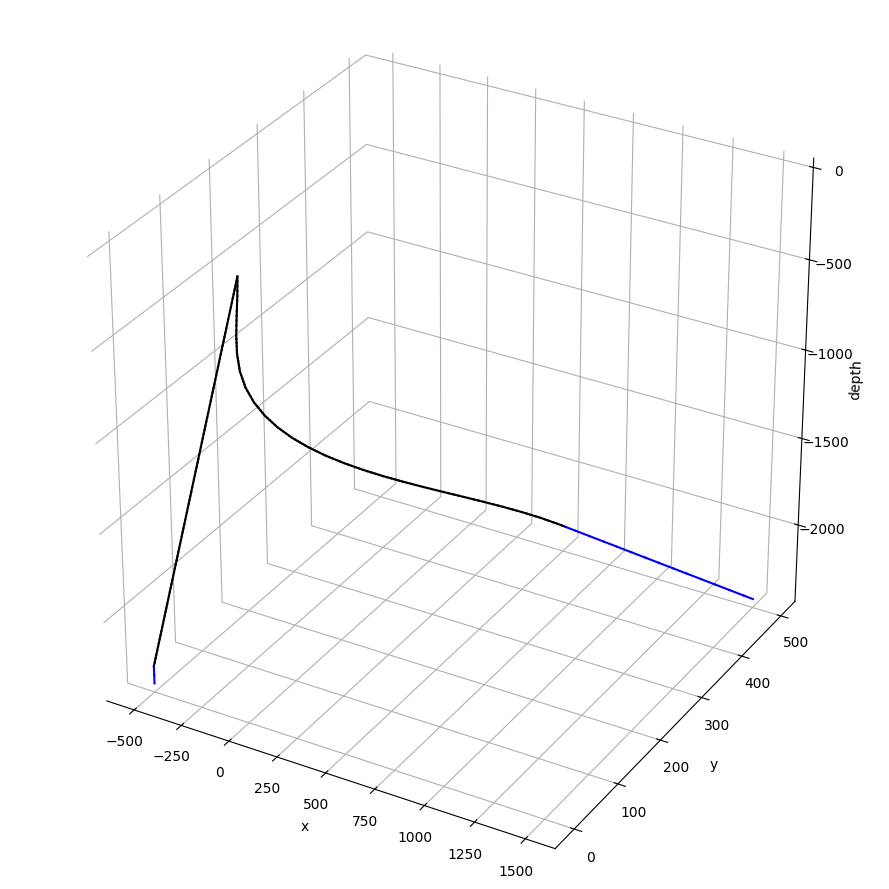

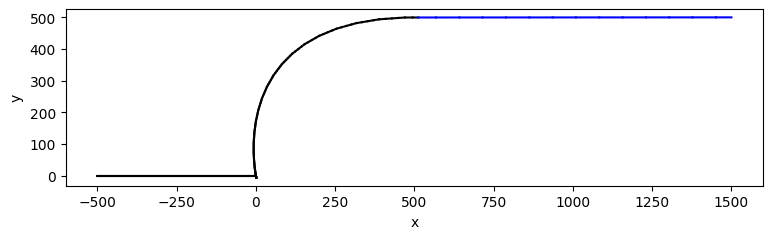

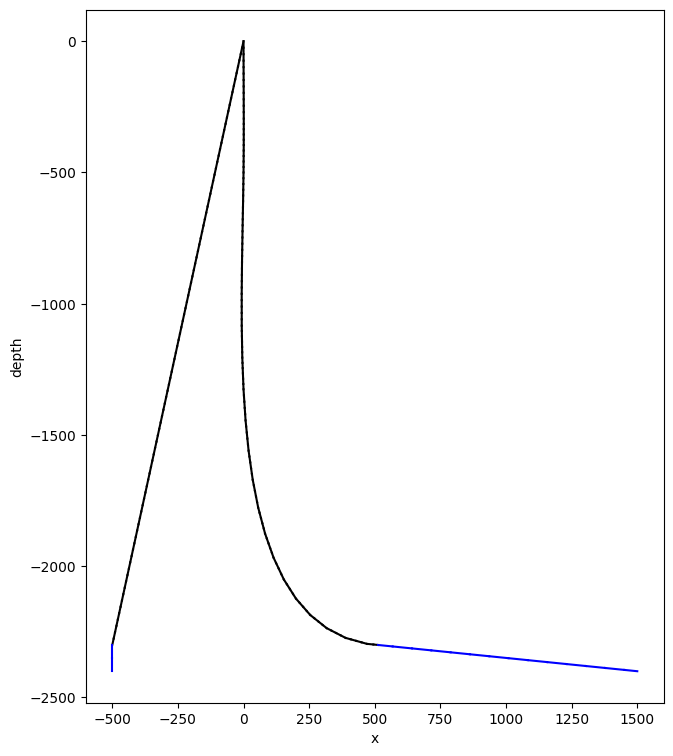

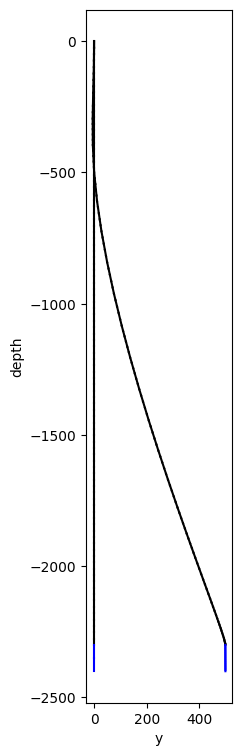

In [15]:
dorun(settingfile, trajectoryfile)